In [4]:
import pandas as pd

forest_fires = pd.read_csv('/content/forestfires.csv')
print(forest_fires.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


The Forest Fires dataset contains 12 features plus 1 target and describes conditions in Montesinho park, Portugal, to predict forest fire occurrence and size.

In [34]:
# Importing Libraries

import matplotlib.pyplot as plt
import math
import numpy as np
import random

# Importing Scikit Learn Libraries

from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Importing keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

import warnings

# supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [5]:
%pip install scikeras

Basic Libraries <br>
 Keras (Deep Learning)<br>
Component	Purpose
- Sequential	Create neural network layer-by-layer.
- Dense	Fully connected layer in a neural network.
- KerasRegressor	Wrap Keras models for use in Scikit-learn workflows.

Warning : Hides certain SciPy warnings that can appear when using LinearRegression or similar models.

Attribute Information:

For more information, read [Cortez and Morais, 2007].

- X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
- Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
- month - month of the year: 'jan' to 'dec'
- day - day of the week: 'mon' to 'sun'
- FFMC - FFMC index from the FWI system: 18.7 to 96.20
- DMC - DMC index from the FWI system: 1.1 to 291.3
- DC - DC index from the FWI system: 7.9 to 860.6
- ISI - ISI index from the FWI system: 0.0 to 56.10
- temp - temperature in Celsius degrees: 2.2 to 33.30
- RH - relative humidity in %: 15.0 to 100
- wind - wind speed in km/h: 0.40 to 9.40
- rain - outside rain in mm/m2 : 0.0 to 6.4
- area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

- Fine Fuel Moisture Code The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.

- Duff Moisture Code The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.

- Drought Code The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

- Initial Spread Index The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel.

In [36]:
# converting month and day into number

forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

/tmp/ipython-input-2286527503.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
/tmp/ipython-input-2286527503.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [37]:
forest_fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0,508.000000
mean,4.685039,4.305118,7.470472,4.267717,91.322047,111.555709,550.333858,8.910925,18.954528,44.484252,3.986614,0.0,0.519685
std,2.327101,1.232136,2.262182,2.072450,2.509410,64.118087,247.463737,3.915813,5.751772,16.332158,1.780792,0.0,0.500105
min,1.000000,2.000000,1.000000,1.000000,86.150000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.0,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,70.525000,442.700000,6.500000,15.575000,33.000000,2.700000,0.0,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.350000,664.500000,8.400000,19.300000,42.000000,4.000000,0.0,1.000000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,714.000000,11.000000,22.800000,53.250000,4.900000,0.0,1.000000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,17.750000,33.300000,100.000000,9.400000,0.0,1.000000


If fire area > 0, set the value to 1 and change column name from area to label so that we can see it as a classification problem


In [7]:
# Converting to Binary Classification Data

forest_fires['area'].values[forest_fires['area'].values > 0] = 1
forest_fires = forest_fires.rename(columns={'area': 'label'})
forest_fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


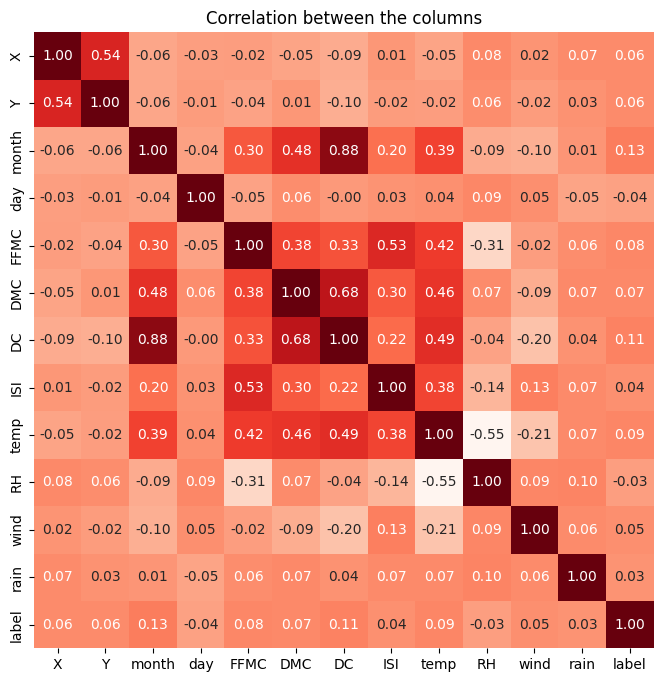

In [25]:
# Correlation Matrix

plt.figure(figsize=(8,8))
sns.heatmap(forest_fires.corr(), annot=True, cbar=False, cmap='Reds', fmt='.2f')
plt.title("Correlation between the columns")
plt.show()

We can find the third highest correlation coefficients would be "month", "DC", "temp"

<Axes: >

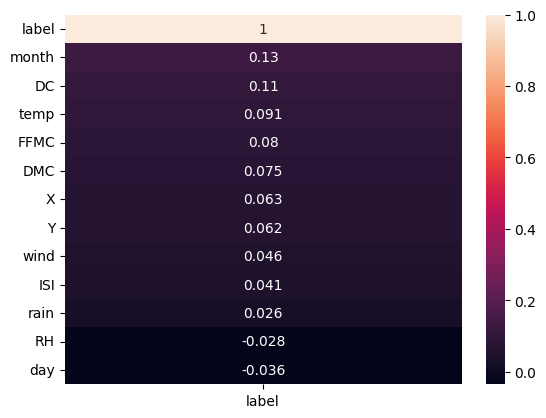

In [26]:
# Check Each feature's correlation with the target column (label)

corr = forest_fires.corr()[['label']].sort_values(by='label', ascending=False)
sns.heatmap(corr, annot=True)

Unsurprising that temperature is most correlated, surprised rain is relatively unimportant.

In [11]:
# Check null values
forest_fires.isnull().sum()

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


In [15]:
# Duplicate Values
forest_fires.duplicated().sum()
forest_fires.drop_duplicates(inplace=True)
forest_fires.duplicated().sum()

np.int64(0)

In [17]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       508 non-null    int64  
 1   Y       508 non-null    int64  
 2   month   508 non-null    int64  
 3   day     508 non-null    int64  
 4   FFMC    508 non-null    float64
 5   DMC     508 non-null    float64
 6   DC      508 non-null    float64
 7   ISI     508 non-null    float64
 8   temp    508 non-null    float64
 9   RH      508 non-null    int64  
 10  wind    508 non-null    float64
 11  rain    508 non-null    float64
 12  label   508 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 55.6 KB


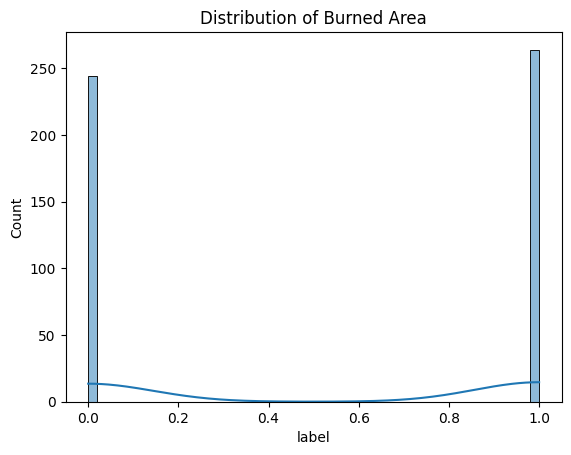

In [20]:
# Univariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(forest_fires['label'], bins=50, kde=True)
plt.title("Distribution of Burned Area")
plt.show()

The smooth KDE curve (the line) confirms that there are no intermediate values — just 0 or 1, which means it’s a classification problem (not regression).

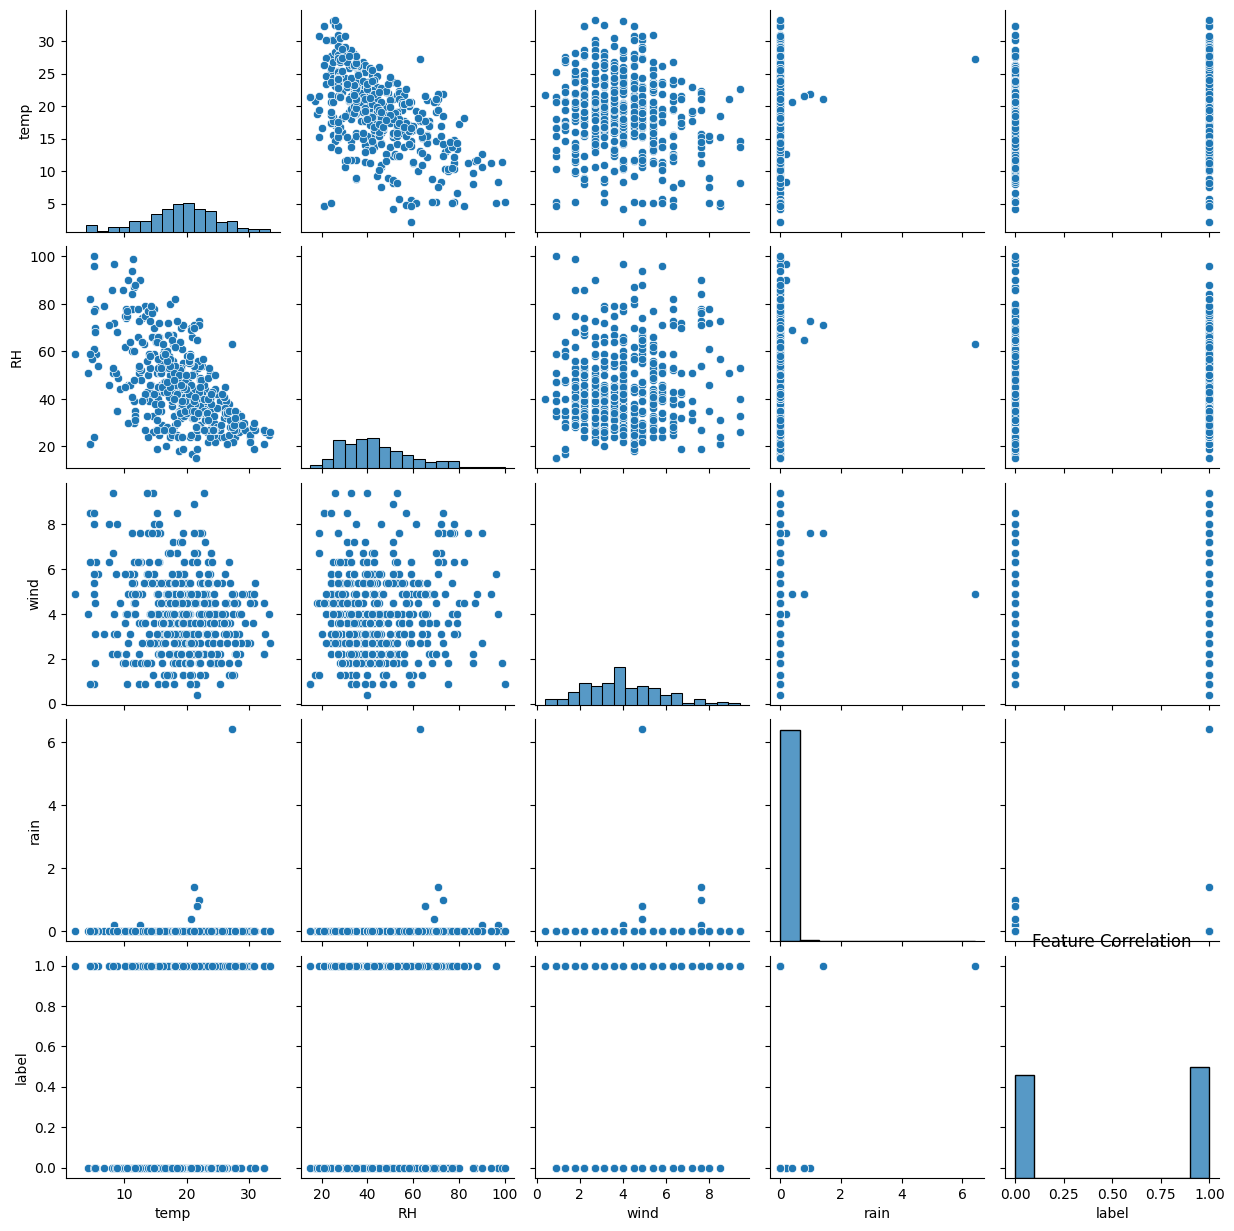

In [23]:
# MultiVariate Analysis

sns.pairplot(forest_fires[['temp', 'RH', 'wind', 'rain', 'label']])
plt.title("Feature Correlation")
plt.show()

Burned area (label = 1) occurs both at high temp & low RH regions → possible indication that fires are more likely in hot, dry conditions.

When rain > 0, almost all labels are 0 (no burn) — showing rain prevents burning.

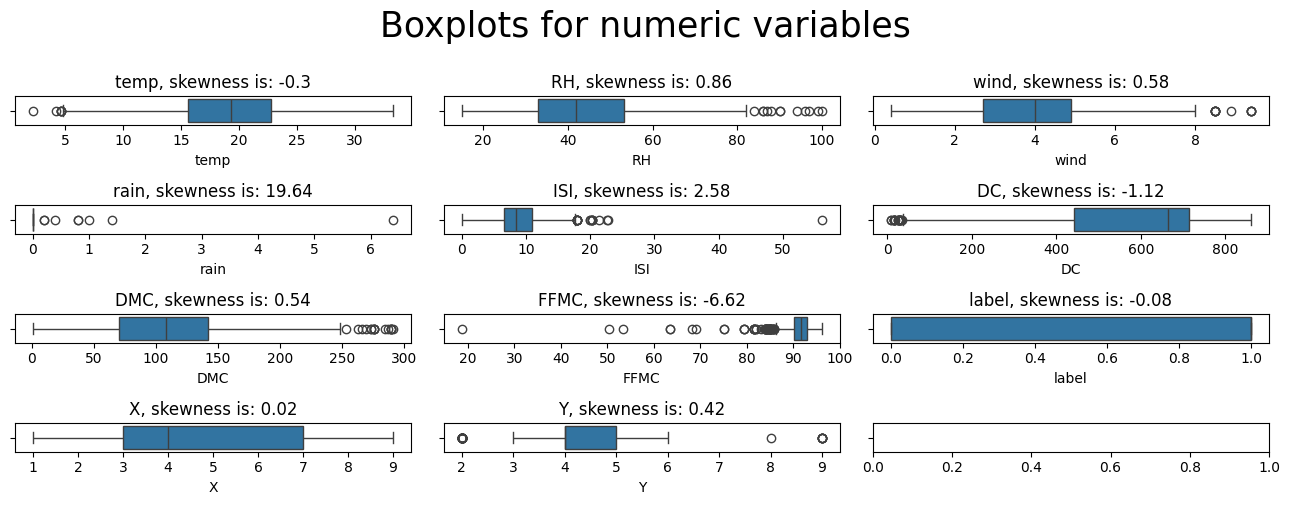

In [31]:
# Univariate Analysis

def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

numerical_columns = list(forest_fires.loc[:,['temp','RH','wind','rain','ISI','DC','DMC',
                 'FFMC','label','X','Y' ]])

boxplots_custom(dataset=forest_fires, columns_list=numerical_columns, rows=4, cols=3, suptitle='Boxplots for numeric variables')
plt.tight_layout()

FFMC, ISI, and rain are the most heavily skewed features

In [35]:
# IQR Capping
features = ['FFMC', 'ISI', 'rain']
for feature in features:
    Q1 = forest_fires[feature].quantile(0.25)
    Q3 = forest_fires[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    forest_fires[feature] = np.where(forest_fires[feature] < lower, lower, forest_fires[feature])
    forest_fires[feature] = np.where(forest_fires[feature] > upper, upper, forest_fires[feature])

## Machine Learning

**Logistic Regression Classification**


---



In [38]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(forest_fires.drop('label',axis=1))
scaled_features = scaler.transform(forest_fires.drop('label',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=forest_fires.columns[:-1])
df_feat.head()

X = df_feat
y = forest_fires['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn import metrics
from sklearn import metrics
logmodel.score(X_train,y_train)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy: 0.5098039215686274
Precision: 0.5641025641025641
Recall: 0.5176470588235295
[[34 34]
 [41 44]]
              precision    recall  f1-score   support

         0.0       0.45      0.50      0.48        68
         1.0       0.56      0.52      0.54        85

    accuracy                           0.51       153
   macro avg       0.51      0.51      0.51       153
weighted avg       0.51      0.51      0.51       153



In [39]:
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=logmodel.predict(x_new)
print(classes[y_predict[0]])

On Fire


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**K-Nearest**


---



WITH K=7


[[31 37]
 [25 60]]


              precision    recall  f1-score   support

         0.0       0.55      0.46      0.50        68
         1.0       0.62      0.71      0.66        85

    accuracy                           0.59       153
   macro avg       0.59      0.58      0.58       153
weighted avg       0.59      0.59      0.59       153

WITH K=17


[[33 35]
 [30 55]]


              precision    recall  f1-score   support

         0.0       0.52      0.49      0.50        68
         1.0       0.61      0.65      0.63        85

    accuracy                           0.58       153
   macro avg       0.57      0.57      0.57       153
weighted avg       0.57      0.58      0.57       153

Accuracy: 0.5751633986928104
Precision: 0.6111111111111112
Recall: 0.6470588235294118
On Fire


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


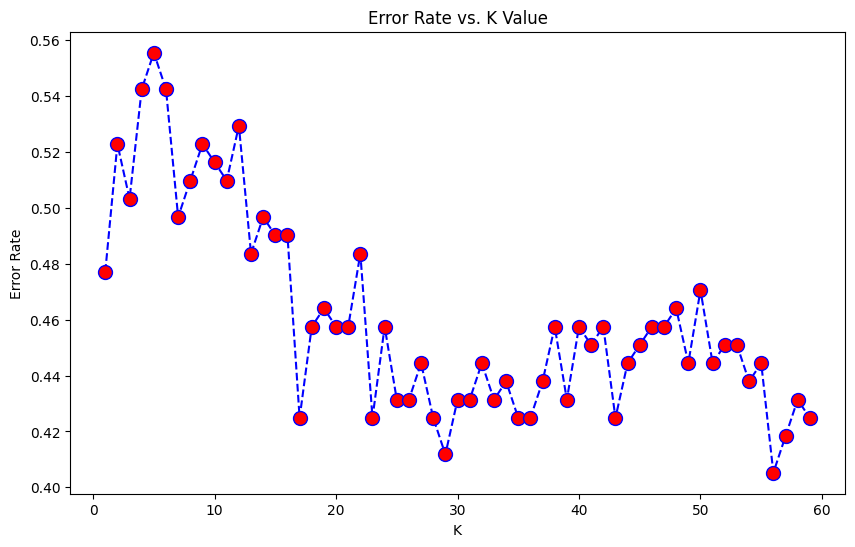

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(forest_fires.drop('label',axis=1))
scaled_features = scaler.transform(forest_fires.drop('label',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=forest_fires.columns[:-1])
df_feat.head()

from sklearn.model_selection import train_test_split
X = df_feat
y = forest_fires['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

error_rate = []

for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


knn = KNeighborsClassifier(n_neighbors=56)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

knn.score(X_test, y_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

classes={0:'safe',1:'On Fire'}
x_new_scaled = scaler.transform(x_new)
y_predict = knn.predict(x_new_scaled)
print(classes[y_predict[0]])

**SVM**

---



In [50]:
# Support Vector Machine
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data

X = forest_fires.drop('label', axis=1)
y = forest_fires['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

svc = SVC()
svc.fit(X_train, y_train)
# make predictions
prediction = svc.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=svc.predict(x_new)
print(classes[y_predict[0]])

              precision    recall  f1-score   support

         0.0       0.67      0.24      0.35        68
         1.0       0.60      0.91      0.72        85

    accuracy                           0.61       153
   macro avg       0.63      0.57      0.53       153
weighted avg       0.63      0.61      0.55       153

[[16 52]
 [ 8 77]]
Accuracy: 0.6078431372549019
Precision: 0.5968992248062015
Recall: 0.9058823529411765
On Fire


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Decision Tree**

---



In [51]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X = forest_fires.drop('label', axis=1)
y = forest_fires['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

# make predictions
predicted = d_tree.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print("Recall:",metrics.recall_score(y_test, predicted))

classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]

y_predict=d_tree.predict(x_new)
print(classes[y_predict[0]])

              precision    recall  f1-score   support

         0.0       0.43      0.47      0.45        68
         1.0       0.54      0.51      0.52        85

    accuracy                           0.49       153
   macro avg       0.49      0.49      0.49       153
weighted avg       0.49      0.49      0.49       153

[[32 36]
 [42 43]]
Accuracy: 0.49019607843137253
Precision: 0.5443037974683544
Recall: 0.5058823529411764
On Fire


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**KNN**

---



In [52]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
X = forest_fires.drop('label', axis=1)
y = forest_fires['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# fit a k-nearest neighbor model to the data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(knn)
# make predictions
predicted = knn.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print("Recall:",metrics.recall_score(y_test, predicted))

classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=knn.predict(x_new)
print(classes[y_predict[0]])

KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.54      0.66      0.59        68
         1.0       0.67      0.54      0.60        85

    accuracy                           0.59       153
   macro avg       0.60      0.60      0.59       153
weighted avg       0.61      0.59      0.60       153

[[45 23]
 [39 46]]
Accuracy: 0.5947712418300654
Precision: 0.6666666666666666
Recall: 0.5411764705882353
On Fire


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Gaussian Naive Bayes**

---



In [53]:
# Gaussian Naive Bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

X = forest_fires.drop('label', axis=1)
y = forest_fires['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# fit a Naive Bayes model to the data
G_NB = GaussianNB()
G_NB.fit(X_train,y_train)
print(G_NB)
# make predictions

predict = G_NB.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predict))
print(metrics.confusion_matrix(y_test, predict))

print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=G_NB.predict(x_new)
print(classes[y_predict[0]])

GaussianNB()
              precision    recall  f1-score   support

         0.0       0.56      0.51      0.53        68
         1.0       0.63      0.67      0.65        85

    accuracy                           0.60       153
   macro avg       0.59      0.59      0.59       153
weighted avg       0.60      0.60      0.60       153

[[35 33]
 [28 57]]
Accuracy: 0.6013071895424836
Precision: 0.6333333333333333
Recall: 0.6705882352941176
safe


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**Random Forest**

---



In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Prepare dataset
X = forest_fires.drop('label', axis=1).copy()
y = forest_fires['label']

#  Log-transform heavily skewed features
skewed_features = ['FFMC', 'ISI', 'rain']
for feature in skewed_features:
    X[feature] = X[feature].apply(lambda x: np.log1p(x))

#  Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

#  Hyperparameter tuning using RandomizedSearchCV (fast)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=101, class_weight='balanced')

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,       # only 20 random combinations, fast
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=101
)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

#  Train best Random Forest model
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

#  Make predictions
y_pred = best_rf.predict(X_test)

#  Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Predict a new sample
classes = {0: 'safe', 1: 'On Fire'}
x_new = [[1, 4, 9, 1, 91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]

# Apply same log-transform to skewed features
for idx, feature in enumerate(skewed_features):
    x_new[0][X.columns.get_loc(feature)] = np.log1p(x_new[0][X.columns.get_loc(feature)])

# Scale new sample
x_new_scaled = scaler.transform(x_new)
y_predict = best_rf.predict(x_new_scaled)
print("Prediction for new sample:", classes[y_predict[0]])


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Accuracy: 0.8359477124183006
Precision: 0.8875
Recall: 0.6529411764705883

Confusion Matrix:
 [[35 33]
 [38 47]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.51      0.50        68
         1.0       0.59      0.55      0.57        85

    accuracy                           0.54       153
   macro avg       0.83      0.53      0.53       153
weighted avg       0.84      0.64      0.54       153

Prediction for new sample: On Fire


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# load dataset
X = forest_fires.drop('label', axis=1)
y = forest_fires['label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=5000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('GradientBoost',GradientBoostingClassifier()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('Bagging',BaggingClassifier()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('ExtraTrees',ExtraTreesClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y,   cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: 0.397961 (0.130887)
KNN: 0.439412 (0.138399)
CART: 0.466549 (0.098450)
NB: 0.490275 (0.136652)
SVM: 0.458902 (0.214118)
MLP: 0.390078 (0.219697)
GradientBoost: 0.409765 (0.134318)
AdaBoost: 0.398039 (0.170026)
Bagging: 0.430941 (0.125463)
RandomForest: 0.405569 (0.121416)
ExtraTrees: 0.389843 (0.118493)


Complex details Non linear
High accuracy low variance
small dataset 
handles missing value or noisy data
feature importance
less parameter tuning needed